<a href="https://colab.research.google.com/github/jyotiprasadkurmi/Bank_customer_churn_rate/blob/main/Loosing_Bank_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = yellow>**Importing Dataset**</font>

In [1]:
#importing_dataset
!gdown 1xh7D0NDmxdg6IXTFzi_T-Oc5D-GtI44W

Downloading...
From: https://drive.google.com/uc?id=1xh7D0NDmxdg6IXTFzi_T-Oc5D-GtI44W
To: /content/Bank-Records.csv
100% 837k/837k [00:00<00:00, 54.8MB/s]


##Data description
* RowNumber—corresponds to the record (row) number and has no effect on the output.
* CustomerId—contains random values and has no effect on customer leaving the bank.
* Surname—the surname of a customer has no impact on their decision to leave the bank.
* CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* Geography—a customer’s location can affect their decision to leave the bank.
* Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
* Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* NumOfProducts—refers to the number of products that a customer has purchased through the bank.
* HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* IsActiveMember—active customers are less likely to leave the bank.
* EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited—whether or not the customer left the bank.
* Complain—customer has complaint or not.
* Satisfaction Score—Score provided by the customer for their complaint resolution.
* Card Type—type of card hold by the customer.
* Points Earned—the points earned by the customer for using credit card.


#<font color = yellow>**Importing Libraries**</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from scipy.stats import probplot

In [3]:
df = pd.read_csv('/content/Bank-Records.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.shape

(10000, 18)

*We have 10,000 rows and 18 columns*

In [5]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

* no null value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [15]:
df_dup = df[df.duplicated()]
print("No of duplicated rows:",df_dup.shape[0])

No of duplicated rows: 0


###<font color = yellow>**Renamed some columns which had extra space between them and replaced it with underscore '_'**</font>

* 'Satisfaction Score' -> 'Satisfaction_Score'
* 'Card Type' -> 'Card_Type'
* 'Point Earned' -> 'Point_Earned'

In [6]:
df.rename(columns = {'Satisfaction Score':'Satisfaction_Score','Card Type':'Card_Type','Point Earned':'Point_Earned'},inplace = True)
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350


##<font color = orange>** Creating a Retained column (0 -> Means left) && (1 -> Means Still a client) *****</font>
* Previously in the Exited column it was 0 --> still a client and 1 --> Left the bank

In [7]:
#Creating a retained column

df['Retained'] = 1 - df['Exited']
df.head(2)

# 0 -> retained
# 1 -> exited

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned,Retained
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1


In [8]:
df = df.drop(columns = ['RowNumber','Surname'])
df.head(3)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned,Retained
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,0
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,0


##<font color = yellow>**Basic_Statistics**</font>

In [9]:
df.describe(include = 'all')

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned,Retained
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100,0.796200
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839,0.402842
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000,1.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000,1.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000,1.000000


* Average CreditScore of the customers is 650.52
* Minimum CreditScore of the customers is 350
* Maximum CreditScore of the customers is 850
---------------------------------------------------
* Mean age of customers was found to be 39 with minimum age being 18 and maximum age ranging to 92.
* The mean years of customers being client to the bank is 5 years with maximum years being 10 years.
* The average no of products the customer has purchased is very less and it boils down to 1.5.
* Maximum no of products that the customer has bought is 4.
-----------------------------------------------------
* Average satisfaction_score for the complaint_resolution is quite average and that turns out to be 3.
* Average points earned by the customer for utilizing their CC is 606.5

In [10]:
df.describe(include = 'number')

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Point_Earned,Retained
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100,0.796200
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839,0.402842
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000,1.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000,1.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000,1.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000,1.000000


In [16]:
def check(df, col_name):
  print("Unique_value: ", df[col_name].unique())
  print("Value counts: ")
  print(df[col_name].value_counts())

In [18]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction_Score',
       'Card_Type', 'Point_Earned', 'Retained'],
      dtype='object')

In [21]:
column_list = ['Geography', 'Gender', 'Age', 'Tenure','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction_Score',
       'Card_Type', 'Retained']
for col in column_list:
  print(col,'-->')
  check(df, col)
  print('\n')

Geography -->
Unique_value:  ['France' 'Spain' 'Germany']
Value counts: 
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


Gender -->
Unique_value:  ['Female' 'Male']
Value counts: 
Gender
Male      5457
Female    4543
Name: count, dtype: int64


Age -->
Unique_value:  [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
Value counts: 
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64


Tenure -->
Unique_value:  [ 2  1  8  7  4  6  3 10  5  9  0]
Value counts: 
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64


NumOfProducts -->
Unique_value:  [1 3 2 4]
Value counts: 
NumOfProducts
1    50

##<font color = yellow>**Distribution Analysis**</font>

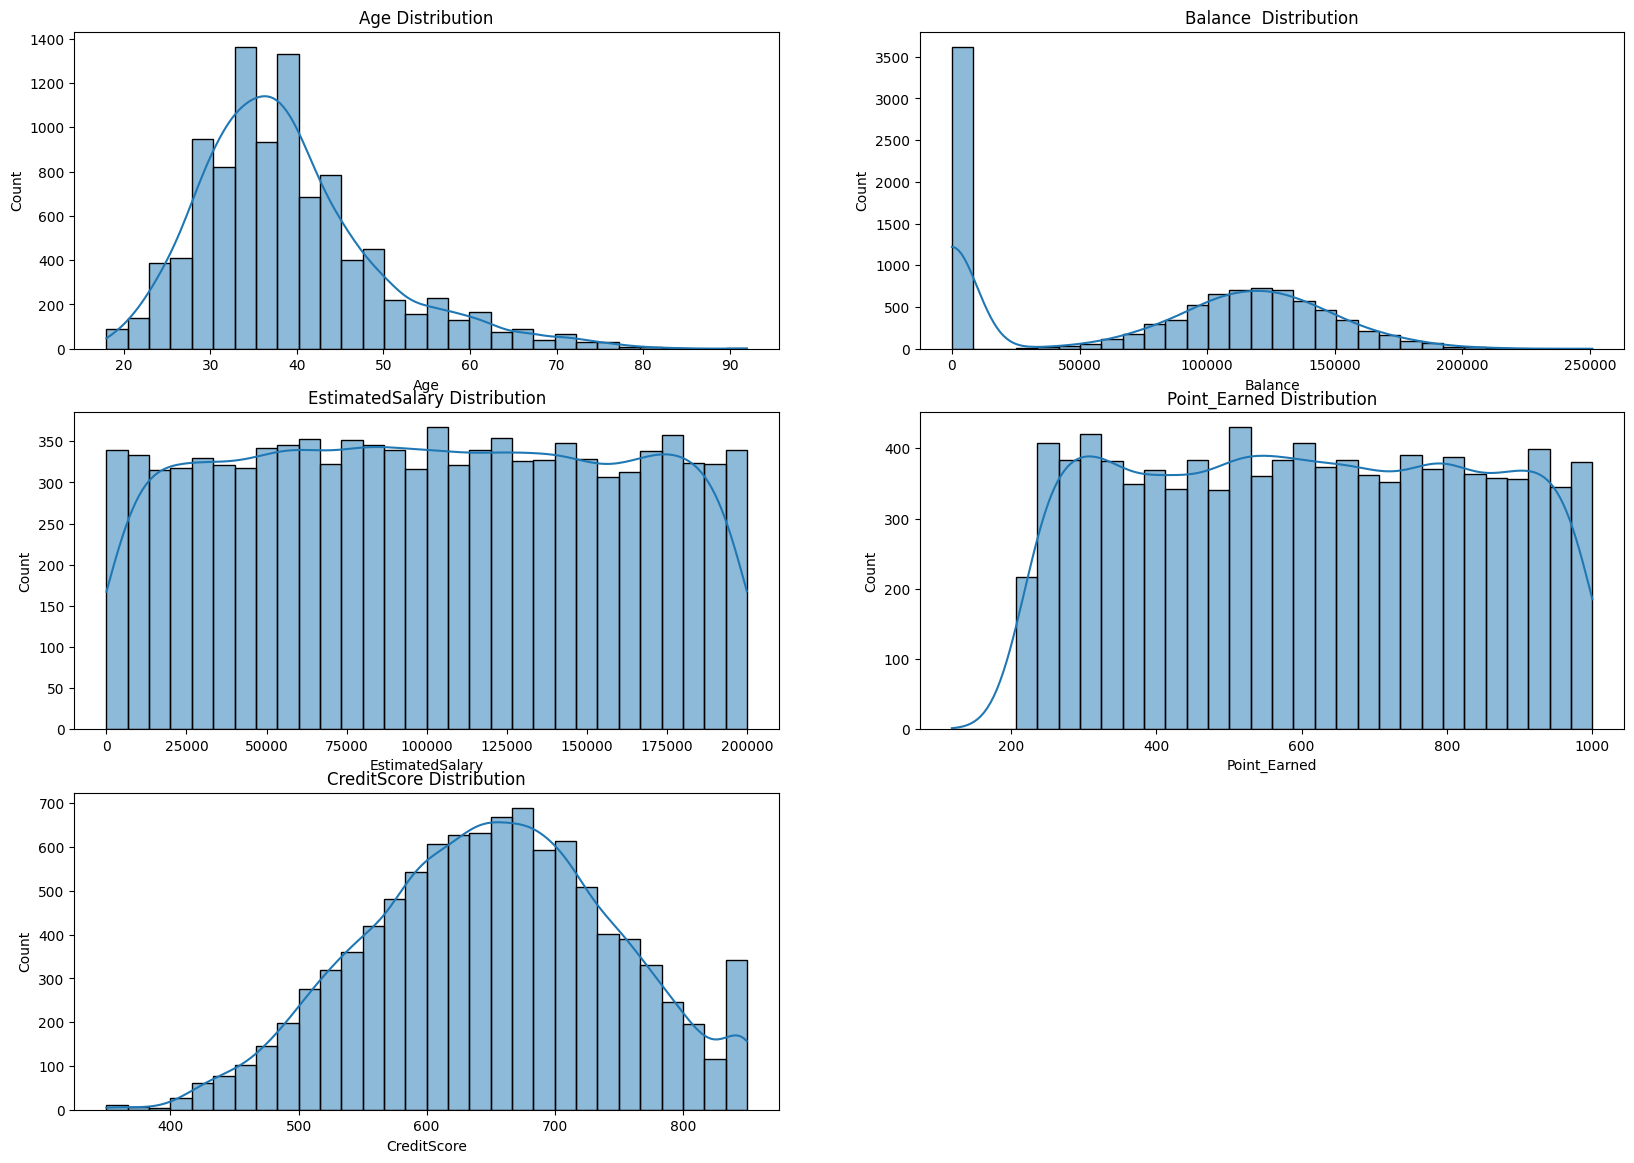

In [27]:
plt.figure(figsize = (20,14))

plt.subplot(3,2,1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(3,2,2)
sns.histplot(df['Balance'], bins=30, kde=True)
plt.title('Balance  Distribution')

plt.subplot(3,2,3)
sns.histplot(df['EstimatedSalary'], bins=30, kde=True)
plt.title('EstimatedSalary Distribution')

plt.subplot(3,2,4)
sns.histplot(df['Point_Earned'], bins=30, kde=True)
plt.title('Point_Earned Distribution')

plt.subplot(3,2,5)
sns.histplot(df['CreditScore'], bins=30, kde=True)
plt.title('CreditScore Distribution')


plt.show()


In [30]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

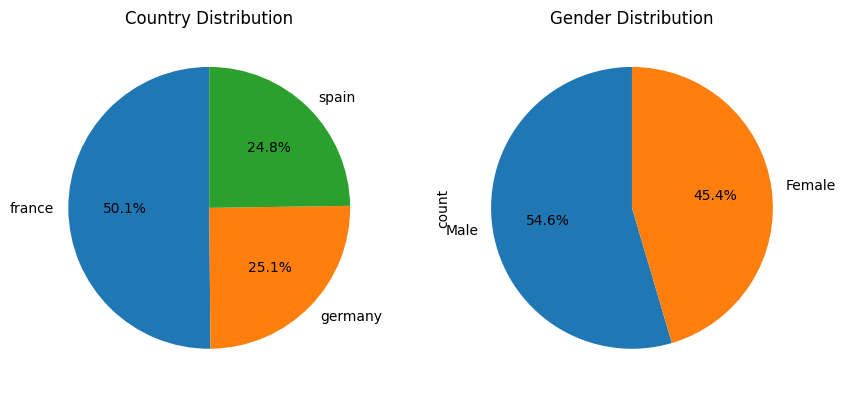

In [40]:
#country wise distribution
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
y = df['Geography'].value_counts()
mylabels = ['france','germany','spain']
plt.pie(y,labels = mylabels,autopct='%1.1f%%', startangle=90)
plt.title('Country Distribution')

plt.subplot(1,2,2)
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')


plt.show()

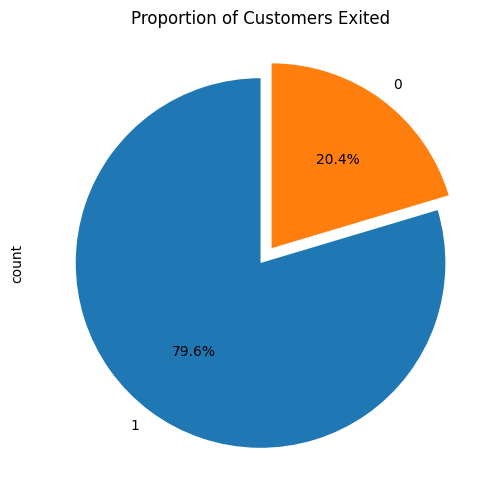

In [74]:
# customers who exited the bank
plt.figure(figsize=(6, 6))
df['Retained'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90, explode=(0, 0.1))
plt.title('Proportion of Customers Exited')
plt.show()


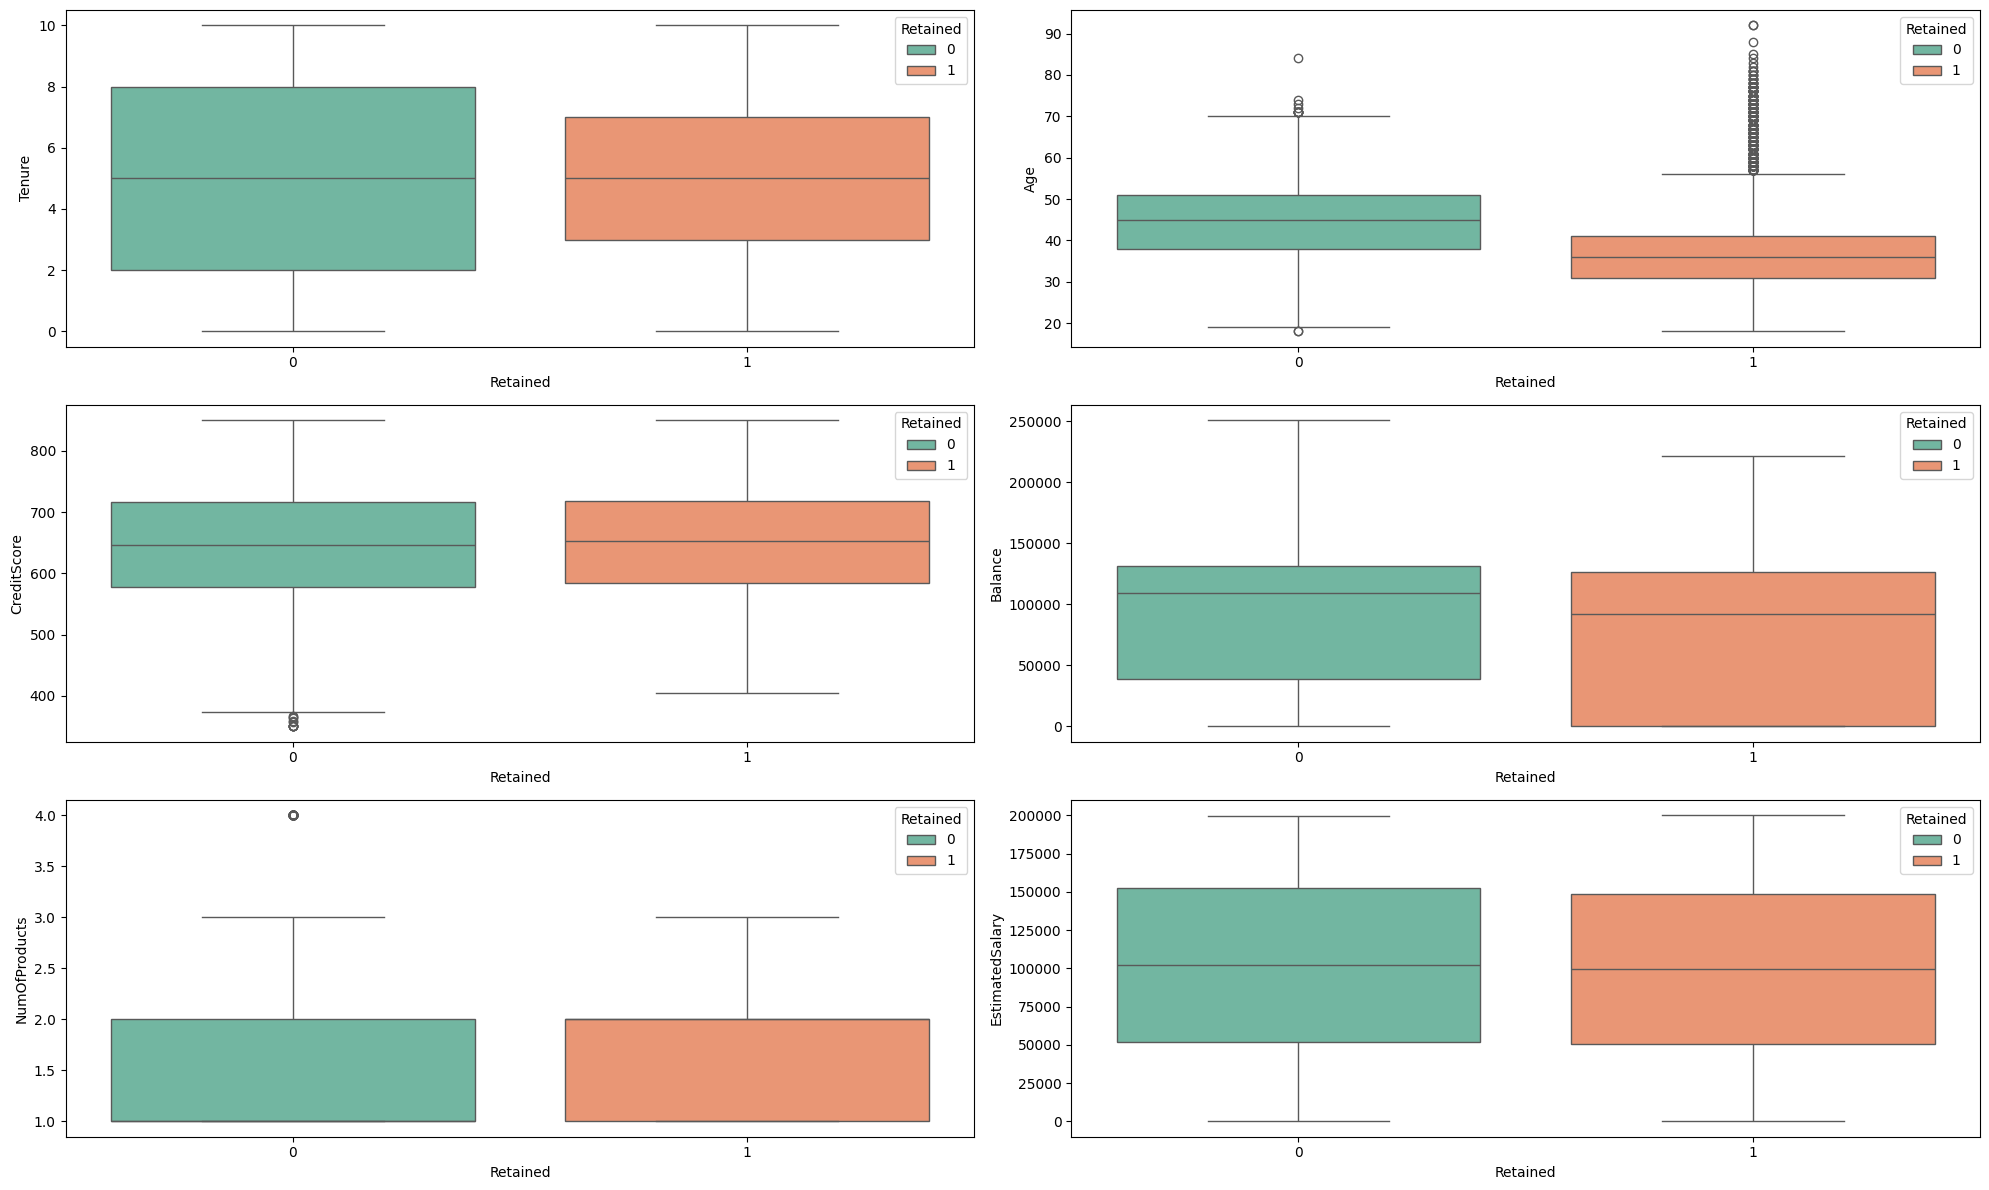

In [ ]:
#customer_tenure
plt.figure(figsize = (20,12))

plt.subplot(3,2,1)
sns.boxplot(data = df,x = 'Retained',y = 'Tenure',hue = 'Retained')


plt.subplot(3,2,2)
sns.boxplot(data = df,x = 'Retained',y = 'Age',hue = 'Retained')

plt.subplot(3,2,3)
sns.boxplot(data = df,x = 'Retained',y = 'CreditScore',hue = 'Retained')

plt.subplot(3,2,4)
sns.boxplot(data = df,x = 'Retained',y = 'Balance',hue = 'Retained')

plt.subplot(3,2,5)
sns.boxplot(data = df,x = 'Retained',y = 'NumOfProducts',hue = 'Retained')

plt.subplot(3,2,6)
sns.boxplot(data = df,x = 'Retained',y = 'EstimatedSalary',hue = 'Retained')


plt.tight_layout()
plt.show()

* 0 --> Customers who have left the bank
* 1 --> Customers who are still a client to the bank
* In the Tenure section we can see that there is no much difference in the average no of years between the customers who have exited the bank.
* The customer with age ranging between 30-40 tends to be a client to the bank whereas the older ages customer prefers not to be the client of the bank.
* There is not much difference with the creditScore for the people who have exited the bank. retained customer and exited customer have the same creditScore. so we still can't say that people with lower creditscore have left the bank.
* customers who are still the client and also have exited had significant amount of balance in their account. But we can also see that the customers who had relatively low balance have left the bank.
* customer who exited the bank had bought same no of products as the retained client.
* EstimatedSalary of the client who have exited is same as the retained client.so,it maybe because of better facilities or better deal some of the customers have exited the bank.


##Correlation between Numerical values

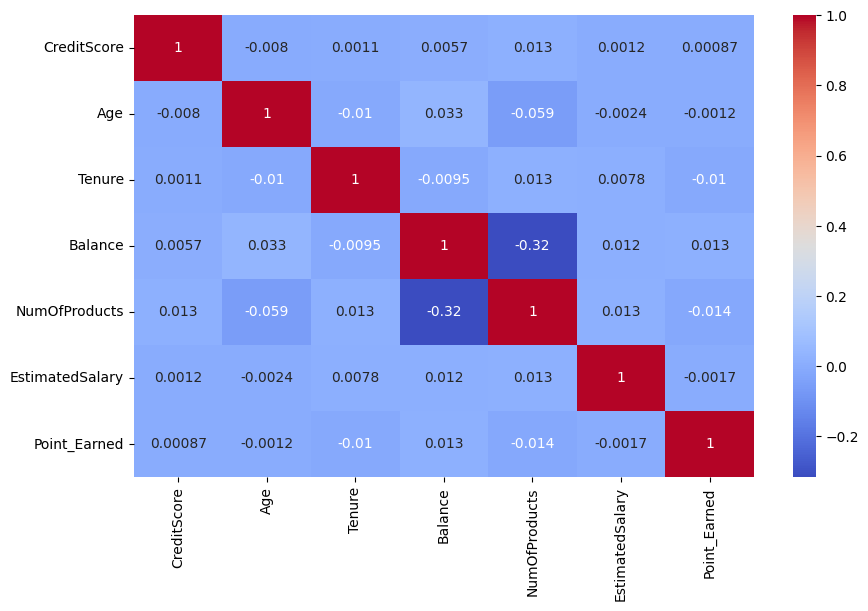

In [79]:

numerical_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary','Point_Earned']

correlation_matrix = df[numerical_col].corr(method = 'spearman')

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

##<font color = yellow>**Customer Profile Analysis**</font>

In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


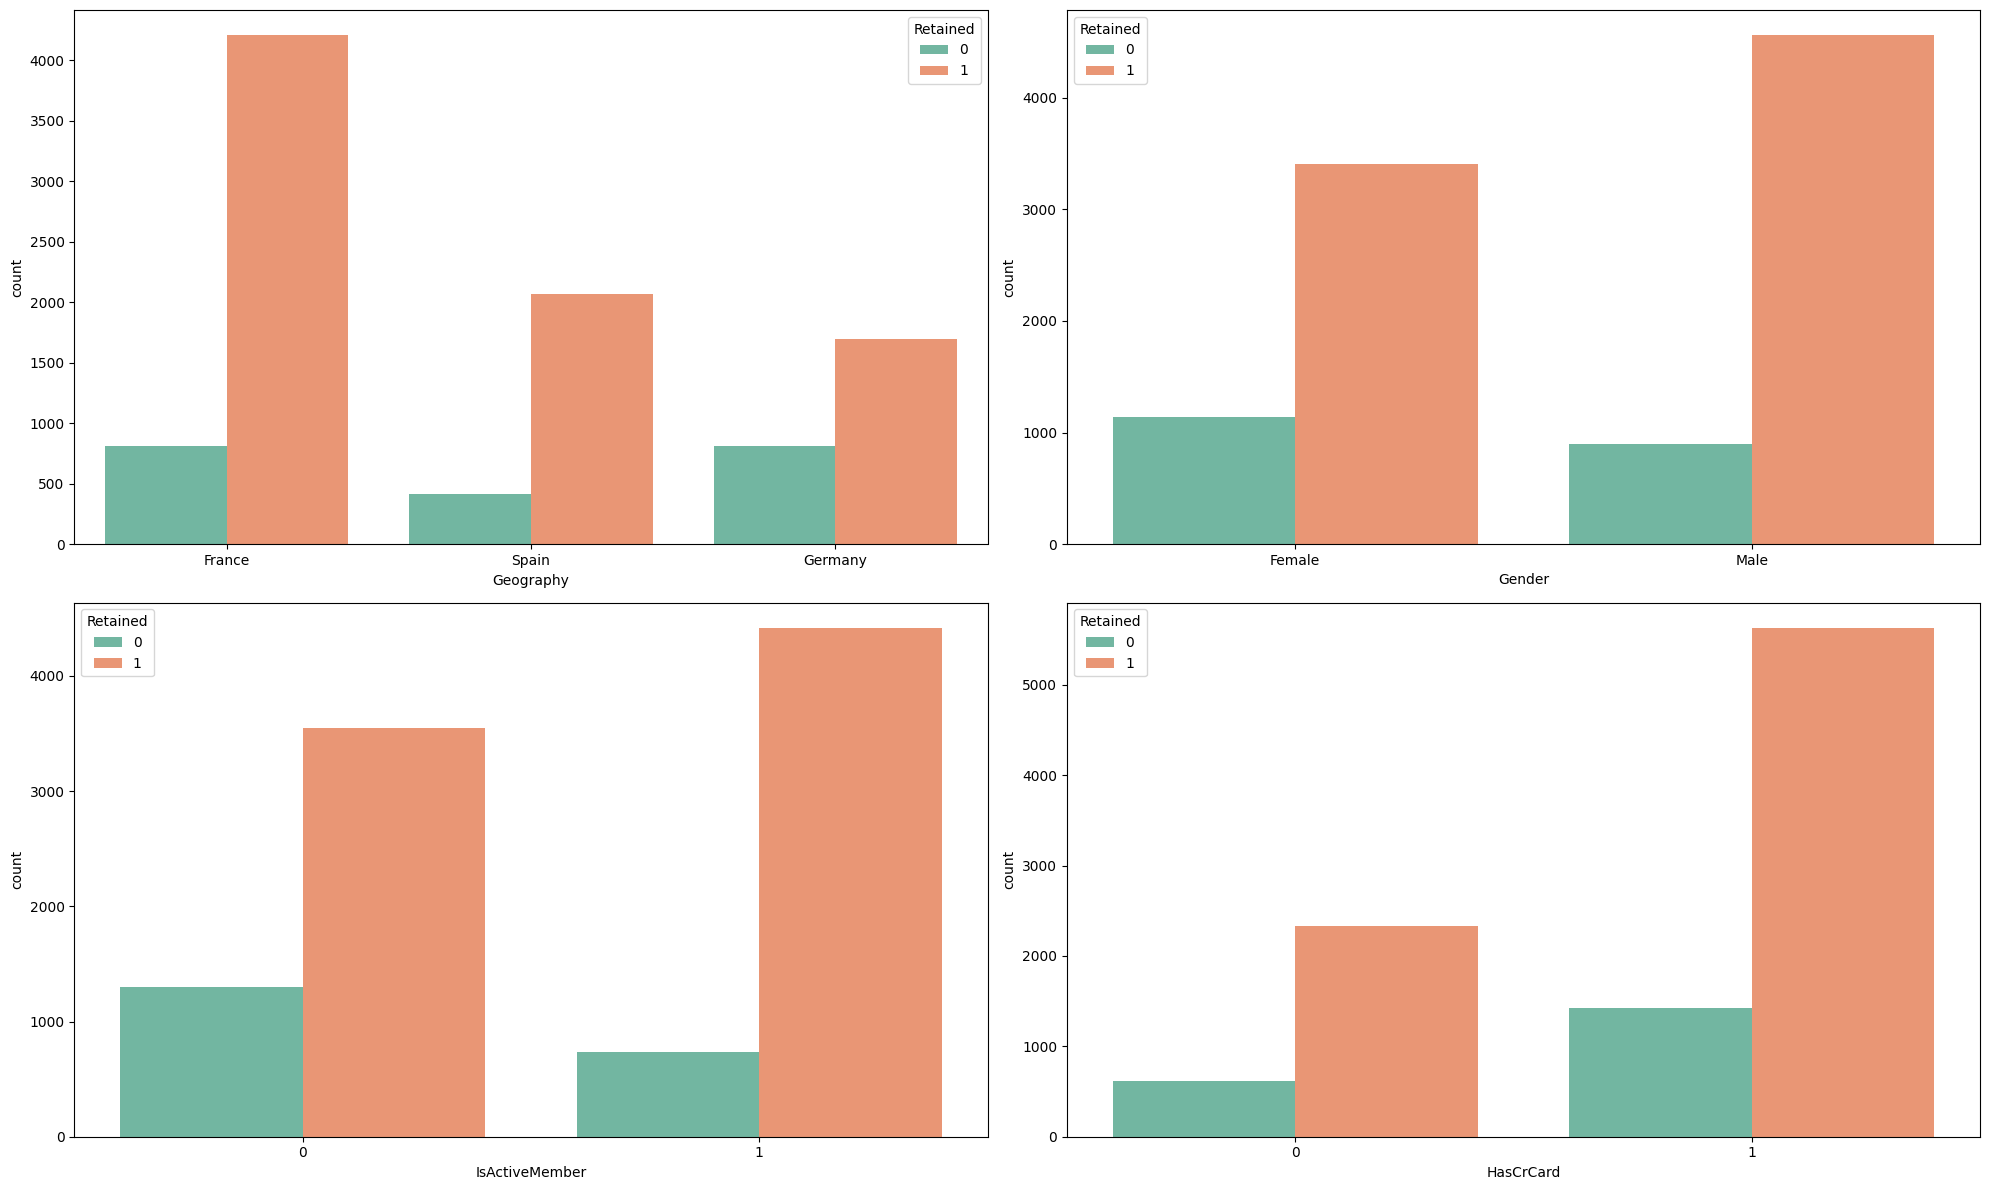

In [ ]:
plt.figure(figsize = (20,12))

palette = sns.set_palette('Set2')

plt.subplot(2,2,1)
sns.countplot(data = df, x = 'Geography', hue = 'Retained',palette = palette)


plt.subplot(2,2,2)
sns.countplot(data = df, x = 'Gender', hue = 'Retained',palette = palette)

plt.subplot(2,2,3)
sns.countplot(data = df, x = 'IsActiveMember', hue = 'Retained',palette = palette)


plt.subplot(2,2,4)
sns.countplot(data = df, x = 'HasCrCard', hue = 'Retained',palette = palette)


plt.tight_layout()
plt.show()

* France  and Germany have higher no of churned customers followed by spain.
* Male customers are in higher no to exit the bank.
* Inactive members are in higher rate of churning.
* most of the customers that churned had Credit card.

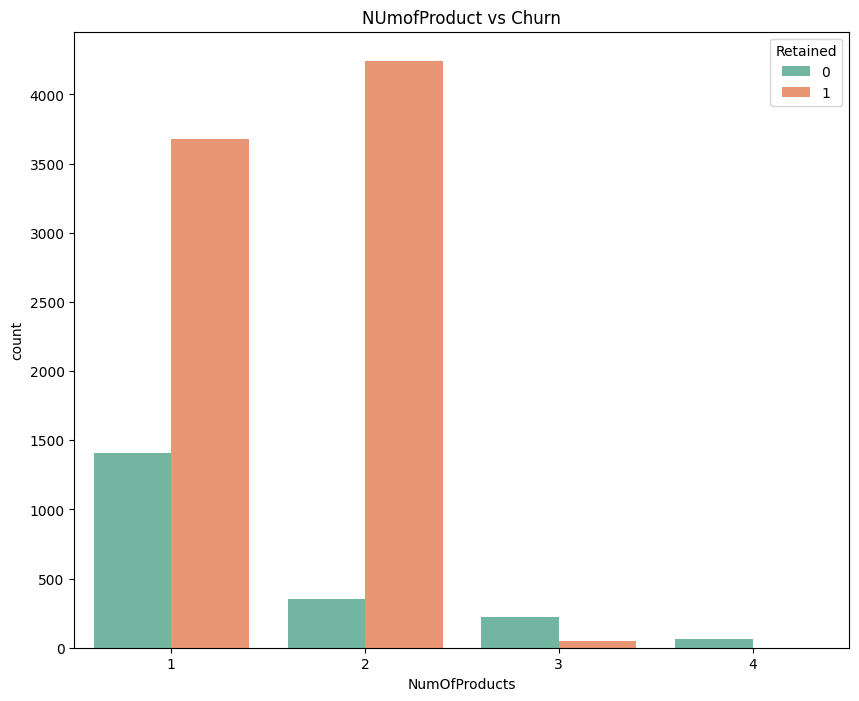

In [ ]:
# Numofprduct usage vs Churn
plt.figure(figsize=(10,8))
palette = sns.set_palette('Set2')

sns.countplot(data = df, x='NumOfProducts',hue = 'Retained',palette = palette)
plt.title('NUmofProduct vs Churn')

plt.show()

In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned,Retained
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,1


In [ ]:
(df['NumOfProducts'].nunique(),df['Complain'].nunique())

(4, 2)

* we have 4 unique product, Now let's find out if any of this product had some effect in the customer churn.
* I am going to group this product with complain and filter out churn rates.
* What i mean is that if a customer is using the product and he makes complaint about it and he decides to leave the bank. so, is there any relationship between products used complain and finally whether happy or not and then decided to stay or leave the bank.

In [ ]:
dw_prod_re = df.groupby(['NumOfProducts','Complain','Retained'])['Retained'].size().reset_index(name = 'counts')
dw_prod_re

,NumOfProducts,Complain,Retained,counts
0,1,0,0,3
1,1,0,1,3672
2,1,1,0,1406
3,1,1,1,3
4,2,0,0,1
5,2,0,1,4234
6,2,1,0,348
7,2,1,1,7
8,3,0,1,46
9,3,1,0,220


* This table filters the client who used different products who no complain or had one, also i have checked their retention.
* Motive is that what if customer used the product had complaint about it and if it wasn't resolved the client left the bank.

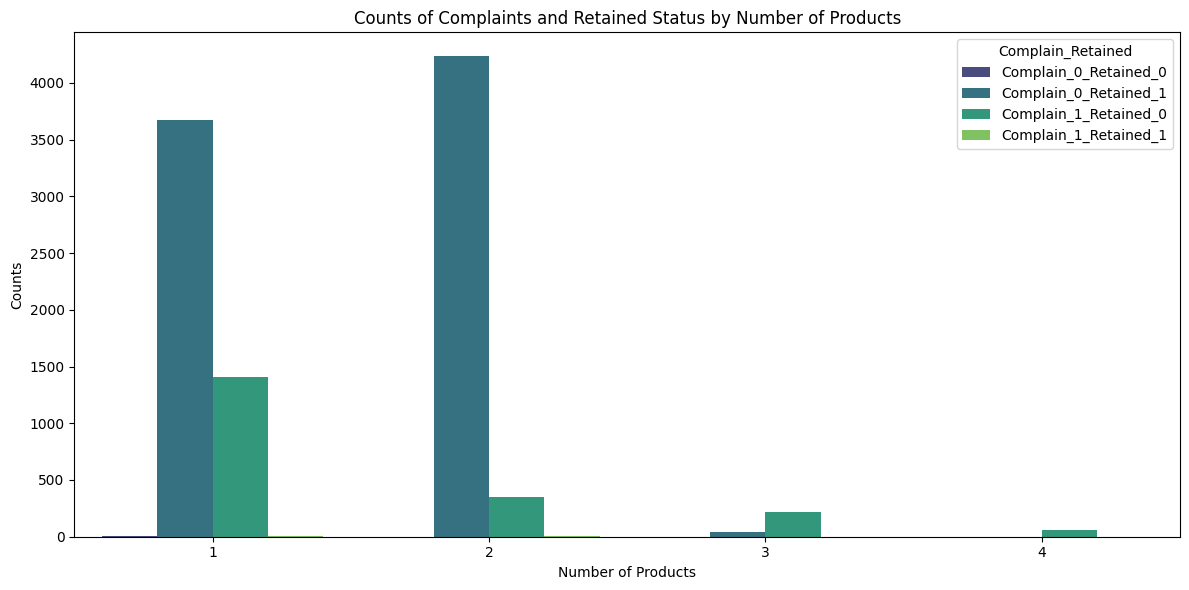

In [ ]:
dw_prod_re['Complain_Retained'] = dw_prod_re.apply(lambda x: f"Complain_{x['Complain']}_Retained_{x['Retained']}", axis=1)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=dw_prod_re, x='NumOfProducts', y='counts', hue='Complain_Retained', palette='viridis')
plt.title('Counts of Complaints and Retained Status by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

In [ ]:
print('#'*150)
print('#'*150)

######################################################################################################################################################
######################################################################################################################################################


In [ ]:
#customer_complaint vs Exited
df['Complain']

0       1
1       1
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Complain, Length: 10000, dtype: int64

In [ ]:
data_complain = df.groupby(['Complain','Retained'])['Retained'].count().reset_index(name = 'counts')
data_complain

,Complain,Retained,counts
0,0,0,4
1,0,1,7952
2,1,0,2034
3,1,1,10


In [ ]:
data_cc = data_complain.pivot(index = 'Complain', columns = 'Retained', values ='counts' )
data_cc

Retained,0,1
Complain,,
0,4,7952
1,2034,10


* 4 customers have churned without any complaint.
* 2034 customers who had complaint was  not retained they left the bank.

* Customers who had complaints with the bank have nostly tried to leave the bank.

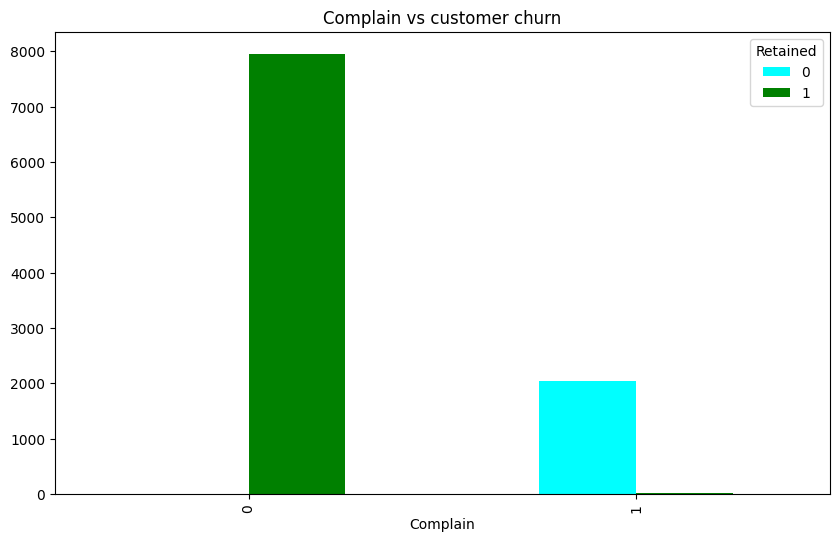

In [ ]:
data_cc.plot(kind='bar', stacked=False, color=['cyan', 'green'], figsize=(10, 6))
plt.title('Complain vs customer churn')
plt.show()

* Customers churning were more for those who had ncomplaint, seeing this we can only say that the bank seems to have been lagging in many areas that might be the reason for churning


In [ ]:
#Satisfaction_Score vs Churn
df['Satisfaction_Score'].nunique()

5

In [ ]:
data = df.groupby(['Satisfaction_Score','Retained'])['Retained'].count().reset_index(name = 'counts')
data

,Satisfaction_Score,Retained,counts
0,1,0,387
1,1,1,1545
2,2,0,439
3,2,1,1575
4,3,0,401
5,3,1,1641
6,4,0,414
7,4,1,1594
8,5,0,397
9,5,1,1607


In [ ]:
plot_data = data.pivot(index='Satisfaction_Score', columns='Retained', values='counts')
plot_data

Retained,0,1
Satisfaction_Score,,
1,387,1545
2,439,1575
3,401,1641
4,414,1594
5,397,1607


<Figure size 1000x600 with 0 Axes>

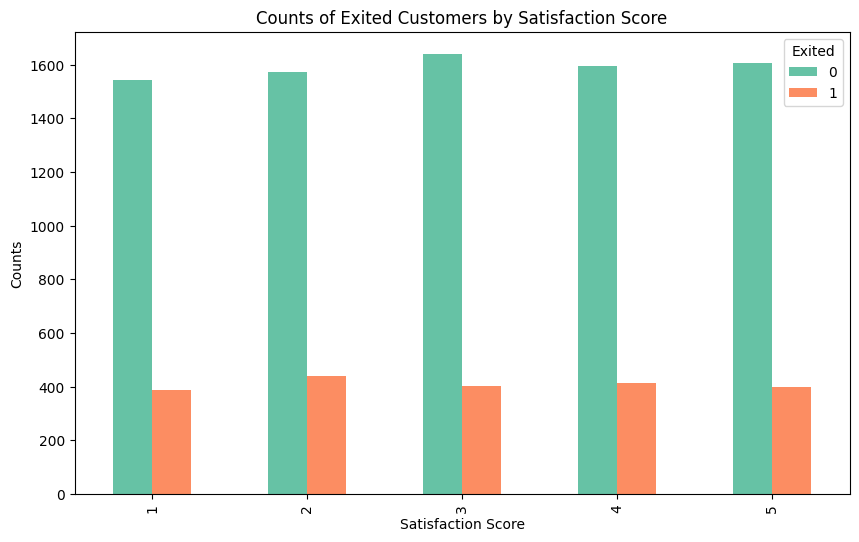

In [ ]:
plt.figure(figsize=(10, 6))
palette = sns.set_palette('Set2')
plot_data.plot(kind='bar', stacked=False, color=palette, figsize=(10, 6))
plt.title('Counts of Exited Customers by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Counts')
plt.legend(title='Exited', loc='upper right')

plt.show()

In [ ]:
#Impact_of_card_type on churn
df['Card_Type'].nunique()

4

In [ ]:
data_CT = df.groupby(['Card_Type','Retained'])['Retained'].count().reset_index(name = 'count')
data_CT

,Card_Type,Retained,count
0,DIAMOND,0,546
1,DIAMOND,1,1961
2,GOLD,0,482
3,GOLD,1,2020
4,PLATINUM,0,508
5,PLATINUM,1,1987
6,SILVER,0,502
7,SILVER,1,1994


In [ ]:
plot_CT = data_CT.pivot(index = 'Retained',columns = 'Card_Type',values = 'count')
plot_CT

Card_Type,DIAMOND,GOLD,PLATINUM,SILVER
Retained,,,,
0,546,482,508,502
1,1961,2020,1987,1994


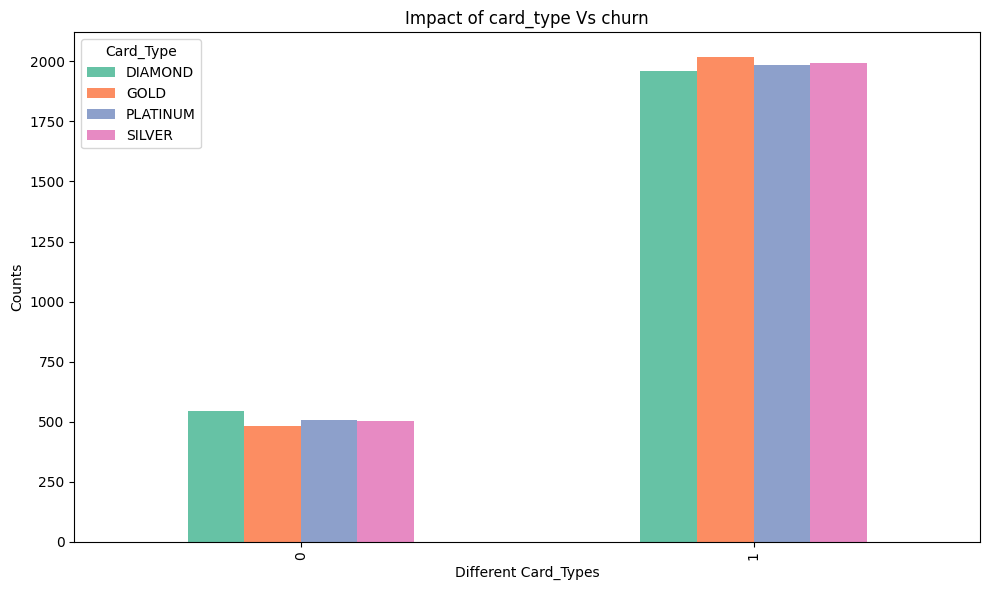

In [ ]:
palette = sns.set_palette('Set2')
plot_CT.plot(kind='bar', stacked=False, color= palette, figsize=(10, 6))
plt.title('Impact of card_type Vs churn')
plt.xlabel('Different Card_Types')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

* all the different card_types had very lower churn rate, that means that the customers who were usind credit cards were still a client to the bank.

#<font color = yellow>Loyalty Points Analysis: Investigate whether Points Earned from credit card usage influence customer retention.

In [ ]:
#Loyalty Points Analysis: Investigate whether Points Earned from credit card usage influence customer retention.
o
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


#Churn rate

In [47]:
total_customer = len(df)
left_customer = len(df[df['Retained']==0])
print('total_customer:', total_customer)
print('left_customer:', left_customer)

churn_rate = (left_customer / total_customer)*100
print('Churn_rate:',round(churn_rate,2),'%')

total_customer: 10000
left_customer: 2038
Churn_rate: 20.38 %


##Churn_rate wrt to geography

In [51]:
df_churn_geography = df.groupby('Geography')['Exited'].mean()*100
print('churn_rate wrt geography\n')
print(df_churn_geography)

churn_rate wrt geography

Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


##churn_rate wrt Age

In [52]:
df_churn_age = df.groupby('Age')['Exited'].mean()*100
print('churn_rate wrt Age\n')
print(df_churn_age)

churn_rate wrt Age

Age
18     9.090909
19     3.703704
20     5.000000
21     5.660377
22    14.285714
        ...    
83     0.000000
84    50.000000
85     0.000000
88     0.000000
92     0.000000
Name: Exited, Length: 70, dtype: float64


## churn_rate wrt Tenure

In [53]:
df_churn_tenure = df.groupby('Tenure')['Exited'].mean()*100
print('churn_rate wrt Tenure\n')
print(df_churn_tenure)

churn_rate wrt Tenure

Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: Exited, dtype: float64


##churn_rate wrt Balance

In [54]:
df_churn_balance = df.groupby('Balance')['Exited'].mean()*100
print('churn_rate wrt Balance\n')
print(df_churn_balance)

churn_rate wrt Balance

Balance
0.00          13.823611
3768.69      100.000000
12459.19     100.000000
14262.80       0.000000
16893.59       0.000000
                ...    
216109.88    100.000000
221532.80      0.000000
222267.63    100.000000
238387.56    100.000000
250898.09    100.000000
Name: Exited, Length: 6382, dtype: float64


#<font color = yellow>Hypothesis Testing

In [ ]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned,Retained
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,0


In [ ]:
df.shape

(10000, 19)

##<font color = yellow> Points_Scored vs HasCrCard Vs Retention relationship

In [66]:
from scipy.stats import ttest_ind

#points_with_creditcard
points_cc_retained = df[(df['HasCrCard']==1) & (df['Retained']==1)]['Point_Earned']
points_cc_exited = df[(df['HasCrCard']==1) & (df['Retained']==0)]['Point_Earned']

#points_without_creditcard
point_without_cc_retained = df[(df['HasCrCard']==0) & (df['Retained']==1)]['Point_Earned']
point_without_cc_exited = df[(df['HasCrCard']==0) & (df['Retained']==0)]['Point_Earned']



##Null Hypothesis (H0): The distributions of points earned are the same across the different groups
## Alternative Hypothesis (Ha): At least one of the distributions of points earned is different.

In [67]:
from scipy.stats import ttest_ind

# for customers with Credit Card

t_stat, pval = ttest_ind(points_cc_retained,points_cc_exited)

print(f't_stat: {t_stat}')
print(f'pval: {pval}')

alpha = 0.05

if pval < alpha:
  print('We reject H0, There is a significant difference in points earned between retained and exited customers')
else:
  print('We fail to reject H0,There is no significant difference in points earned between retained and exited customers')

t_stat: 1.2421820399009698
pval: 0.21421070579194074
We fail to reject H0,There is no significant difference in points earned between retained and exited customers


In [76]:
from scipy.stats import ttest_ind

# for customers without Credit Card

t_stat, pval = ttest_ind(point_without_cc_retained,point_without_cc_exited)

print(f't_stat: {t_stat}')
print(f'pval: {pval}')

alpha = 0.05

if pval < alpha:
  print('We reject H0, There is a significant difference in points earned between retained and exited customers')
else:
  print('We fail to reject H0,There is no significant difference in points earned between retained and exited customers')

t_stat: -1.0538305821824168
pval: 0.2920469990129399
We fail to reject H0,There is no significant difference in points earned between retained and exited customers


## <font color = orange>**--> From the test we can say that points_earned made no significance difference between the retention and churn of the customers.**</font>


In [ ]:
#Salary and Churn: Analyze the relationship between EstimatedSalary and customer churn, focusing on how financial well-being might influence churn decisions.

##<font color = yellow>#Salary and Churn: Analyze the relationship between EstimatedSalary and customer churn, focusing on how financial well-being might influence churn decisions.

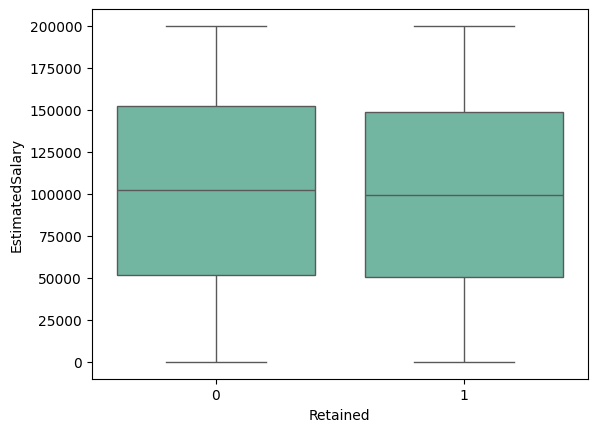

In [ ]:
palette = sns.set_palette('Set2')
sns.boxplot(data = df, x = 'Retained', y = 'EstimatedSalary')
plt.show()

In [77]:
df.groupby('Retained')['EstimatedSalary'].mean()

Retained
0    101509.908783
1     99726.853141
Name: EstimatedSalary, dtype: float64

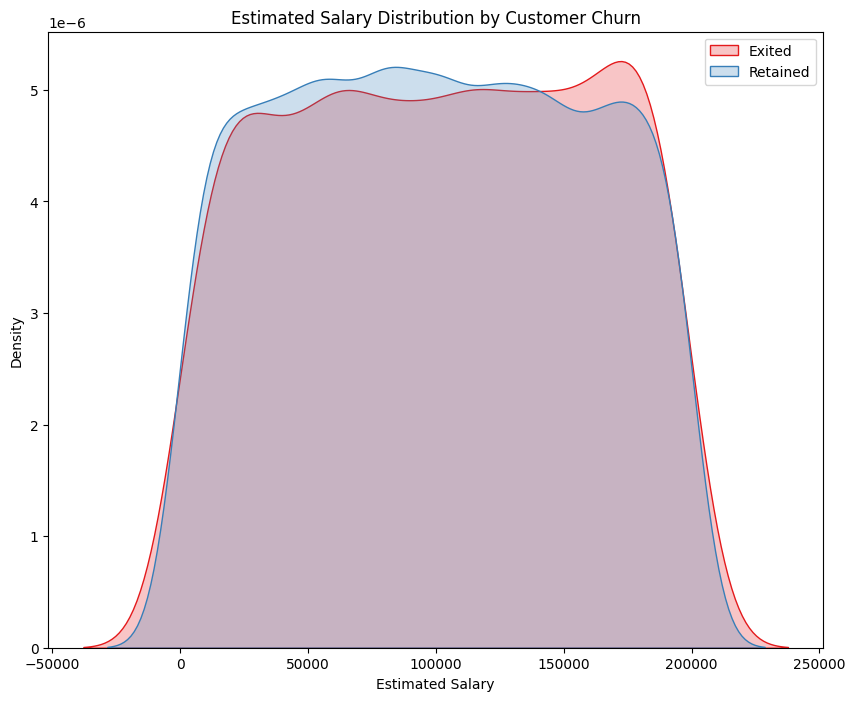

In [ ]:
plt.figure(figsize = (10,8))
palette = sns.set_palette('Set1')

sns.kdeplot(df[df['Retained'] == 0]['EstimatedSalary'], label='Exited', color=palette,fill = True)
sns.kdeplot(df[df['Retained'] == 1]['EstimatedSalary'], label='Retained', color=palette,fill = True)
plt.legend()
plt.title('Estimated Salary Distribution by Customer Churn')
plt.xlabel('Estimated Salary')
plt.ylabel('Density')
plt.show()

In [65]:


from scipy.stats import ttest_ind

retained_client = df[df['Retained'] == 1]['EstimatedSalary']
churned_client = df[df['Retained'] == 0]['EstimatedSalary']

t_stat, p_val = ttest_ind(retained_client, churned_client)

print(f't_stat: {t_stat}')
print(f'p_val: {p_val}')

alpha = 0.05

if p_val < alpha:
  print('We reject Null Hypothesis, there is a significant difference in mean estimated_salary between retained and churned client')
else:
  print('We fail to reject Null Hypothesis, there is no significant difference in mean estimated_salary between retained and churned client')

t_stat: -1.2489445044833742
p_val: 0.2117146135149097
We fail to reject Null Hypothesis, there is no significant difference in median estimated_salary between retained and churned client


##<font color = orange>**EstimatedSalary has no effect on Retention and churn**</font>


In [ ]:
# Relation between balance and customer churn

###<font color = yellow>Relation between balance and customer churn

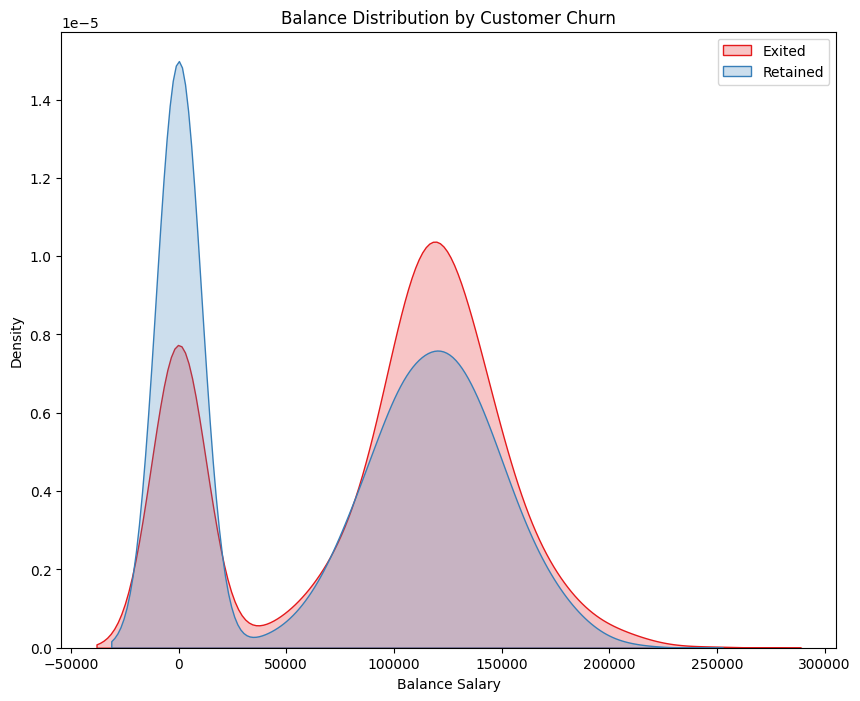

In [ ]:
plt.figure(figsize = (10,8))
palette = sns.set_palette('Set1')

sns.kdeplot(df[df['Retained'] == 0]['Balance'], label='Exited', color=palette,fill = True)
sns.kdeplot(df[df['Retained'] == 1]['Balance'], label='Retained', color=palette,fill = True)
plt.legend()
plt.title('Balance Distribution by Customer Churn')
plt.xlabel('Balance Salary')
plt.ylabel('Density')
plt.show()

##Balance Vs Customer churn

In [63]:
balance_vs_churn = df[df['Retained'] == 0]['Balance']
balance_vs_retained = df[df['Retained'] == 1]['Balance']

In [64]:

from scipy.stats import ttest_ind

t_stat, pval = ttest_ind(balance_vs_churn,balance_vs_retained)

print(f't_stat: {t_stat}')
print(f'pval: {pval}')

alpha = 0.05

if pval < alpha:
  print('We reject Null Hypothesis,There is a significant difference in Mean Balance between retained and exited customers.')
else:
  print('We Fail to reject Null Hypothesis,There is no significant difference in Mean Balance between retained and exited customers.')

t_stat: 11.940747722508185
pval: 1.2092076077156017e-32
We reject Null Hypothesis,There is a significant difference in Mean Balance between retained and exited customers.


* We can say that the customers who had left the bank had significant differences in the balance present in their account, whereas the customers who were still a client to the bank had significant amount of balance.

#<font color = red>Age Vs Customer churn

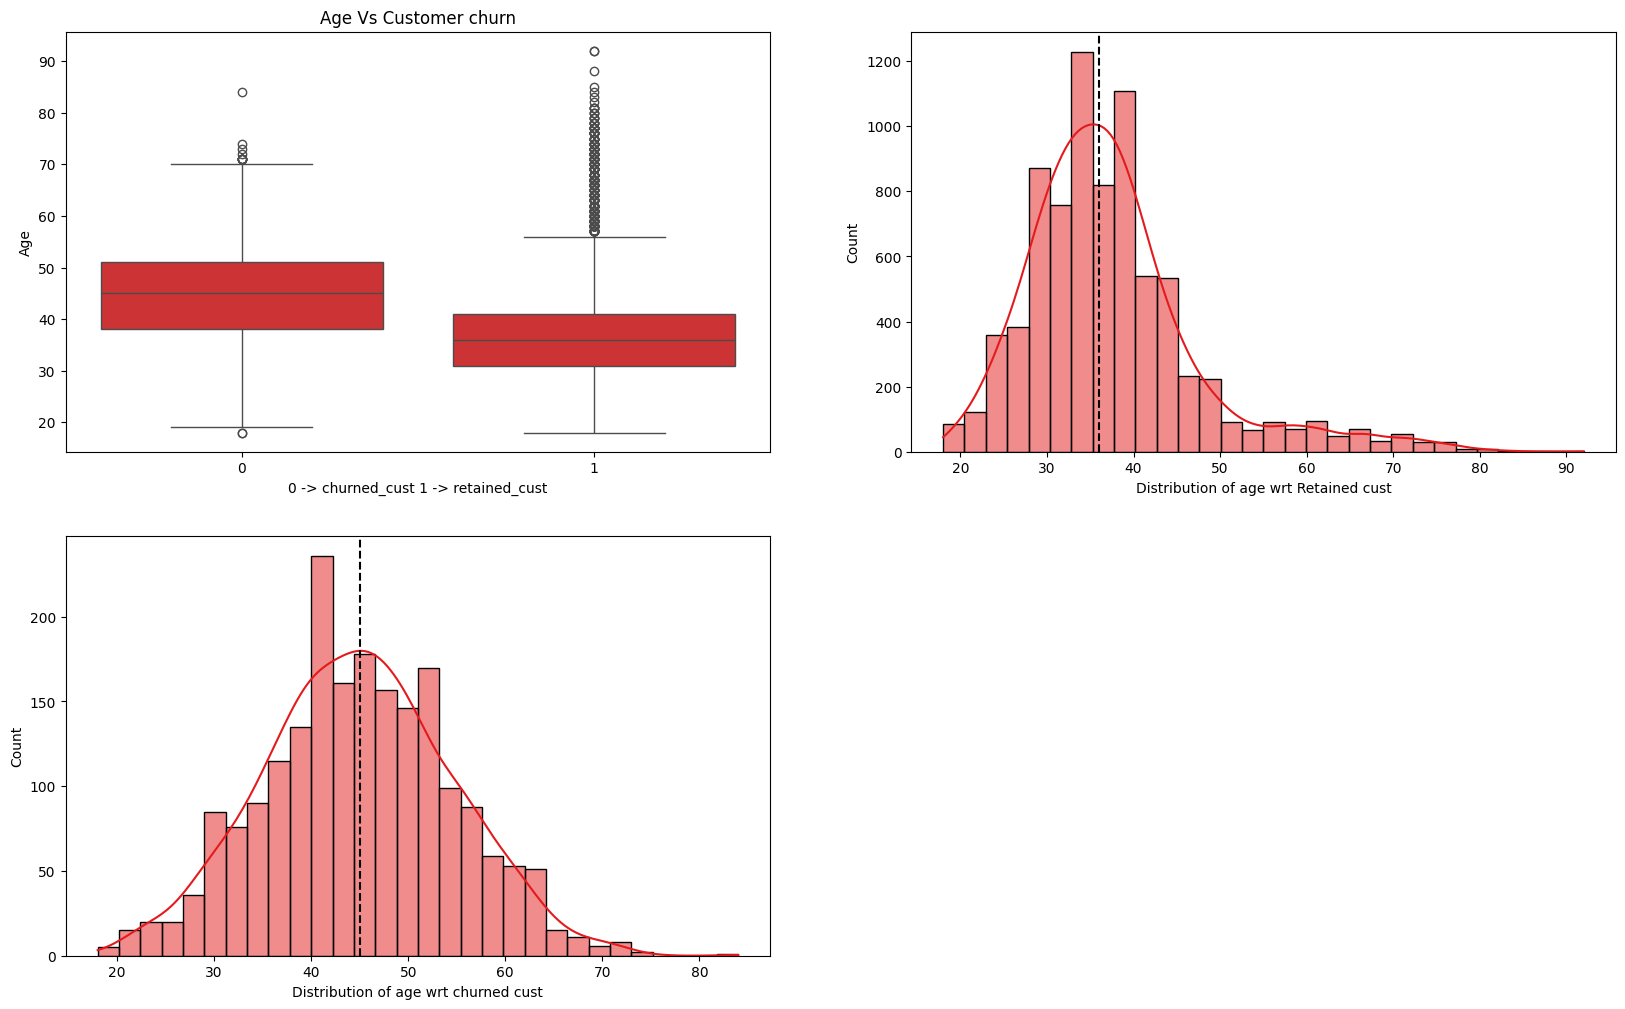

In [ ]:
age_retained = df[df['Retained'] == 1]['Age']
age_churned = df[df['Retained']== 0]['Age']


plt.figure(figsize = (20,12))

plt.subplot(2,2,1)
sns.boxplot(x = 'Retained', y = 'Age',data = df)
plt.title("Age Vs Customer churn")
plt.xlabel('0 -> churned_cust 1 -> retained_cust')
plt.ylabel('Age')

plt.subplot(2,2,2)
sns.histplot(age_retained,bins = 30,kde = True)
plt.axvline(np.percentile(age_retained,50),color = 'black',linestyle = '--',label = 'median')
plt.xlabel('Distribution of age wrt Retained cust')

plt.subplot(2,2,3)
sns.histplot(age_churned,bins = 30,kde = True)
plt.axvline(age_churned.median(),color = 'black',linestyle = '--',label = 'median')
plt.xlabel('Distribution of age wrt churned cust')

plt.show()

* Null Hypothesis (H0): The distribution of age is the same across the two groups (retained and churned).
* Alternative Hypothesis (Ha): The distribution of age is different across the two groups.

In [61]:
from scipy.stats import ttest_ind

age_retained = df[df['Retained'] == 1]['Age']
age_churned = df[df['Retained']== 0]['Age']

t_stats, pval  = ttest_ind(age_retained, age_churned, equal_var = False)

print(f'k_stats: {t_stats}')
print(f'pval: {pval}')

alpha = 0.05

if pval < alpha:
  print("We reject Null Hypothesis, The distribution of age is different across the two groups.")
else:
  print("We Fail to reject Null Hypothesis, The distribution of age is same across the two groups (retained and churned).")


k_stats: -30.420282283546275
pval: 4.399451965599354e-179
We reject Null Hypothesis, The distribution of age is different across the two groups.


* from this we can understand that the retained customers age group is different from the churned customers.
* THe bank must come with innovative ways to retain this age group of customers.

##<font color = red> IsActive Member vs Churn

In [ ]:
contingency = pd.crosstab(df['IsActiveMember'],df['Retained'])
contingency

Retained,0,1
IsActiveMember,,
0,1303,3546
1,735,4416


In [ ]:
from scipy.stats import chi2_contingency


ch_stat, p_val, dof, expected = chi2_contingency(contingency)

print(f'ch_stat: {ch_stat}')
print(f'p_val: {p_val}')
print(f'dof: {dof}')
print(f'expected: {expected}')

#H0 --> There is no significant difference between the active customers and the churned customers.
#Ha --> There is a significant difference between active customers and churned customers.


alpha  = 0.05

if p_val < alpha:
  print('we reject the null hypothesis, There is a significant difference between active customers and churned customers.')
else:
  print('we fail to reject null hypothesis, There is no significant difference between active and churned customers.')

ch_stat: 243.6948024819593
p_val: 6.153167438113408e-55
dof: 1
expected: [[ 988.2262 3860.7738]
 [1049.7738 4101.2262]]
we reject the null hypothesis, There is a significant difference between active customers and churned customers.


##<font color = yellow>Lets find out relation between isactive customers and their satisfaction score wrt churn rate.

In [ ]:
contingency_actv_churn = pd.crosstab(df['IsActiveMember'], df['Satisfaction_Score'])
contingency_actv_churn

Satisfaction_Score,1,2,3,4,5
IsActiveMember,,,,,
0,947,993,970,996,943
1,985,1021,1072,1012,1061


In [ ]:
dw = df.groupby(['IsActiveMember','Retained','Satisfaction_Score'])['Satisfaction_Score'].size().reset_index(name = 'counts')
dw

,IsActiveMember,Retained,Satisfaction_Score,counts
0,0,0,1,241
1,0,0,2,288
2,0,0,3,260
3,0,0,4,270
4,0,0,5,244
5,0,1,1,706
6,0,1,2,705
7,0,1,3,710
8,0,1,4,726
9,0,1,5,699


In [ ]:
dw_pivot = dw.pivot(index = 'Satisfaction_Score', columns = ['IsActiveMember','Retained'], values = 'counts')
dw_pivot

IsActiveMember        0         1     
Retained              0    1    0    1
Satisfaction_Score                    
1                   241  706  146  839
2                   288  705  151  870
3                   260  710  141  931
4                   270  726  144  868
5                   244  699  153  908

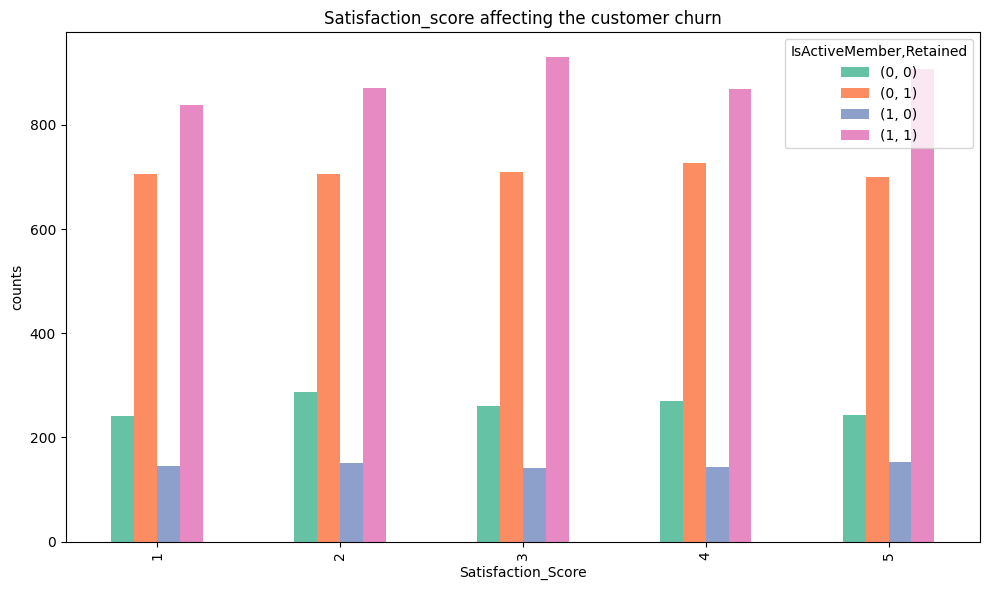

In [ ]:
palette = sns.set_palette('Set2')
dw_pivot.plot(kind='bar', stacked=False, color= palette, figsize=(10, 6))
plt.xlabel('Satisfaction_Score')
plt.ylabel('counts')
plt.title('Satisfaction_score affecting the customer churn')

plt.tight_layout()
plt.show()

* From this bar chart we can infer that the customer who churned didn't had a very high satisfaction score, means they were not satisfied with the bank services.
* And it is also alarming that these customers were active member that means they had bought products and used services, yet their satisfaction score was very low that means they were not satisfied with the service provided by the bank.
* What we can do is that do survey with this active customers who just left the bank and try to know the motive behind their decision of leaving the bank.

##<font color = yellow>Geography vs churn_rates

In [ ]:
contingency_geo_retained = pd.crosstab(df['Geography'],columns = df['Retained'])
contingency_geo_retained

Retained,0,1
Geography,,
France,811,4203
Germany,814,1695
Spain,413,2064


In [ ]:
dg = df.groupby(['Geography','Retained'])['Retained'].count().reset_index(name = 'counts')

dg_plot = dg.pivot(index = 'Geography',columns = 'Retained', values = 'counts')
dg_plot

Retained,0,1
Geography,,
France,811,4203
Germany,814,1695
Spain,413,2064


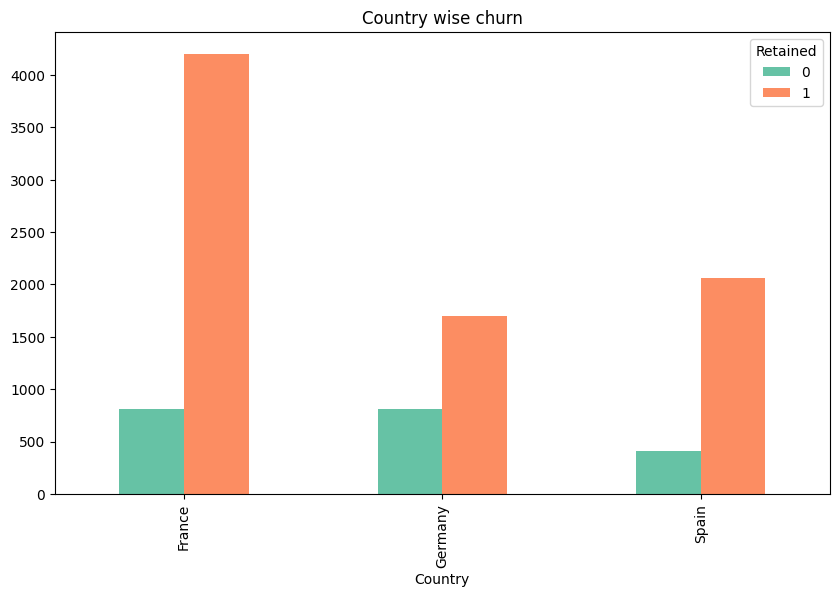

In [ ]:
dg_plot.plot(kind = 'bar', stacked = False, color = palette, figsize=(10, 6) )
plt.xlabel('Country')
plt.title('Country wise churn')
plt.show()

* From this bar plot we can see that germany has more churn rates.

##<font color = yellow>chisquare contingency test to check whether geography plays any role in customer churn rate.

In [ ]:
#H0 --> There is no significant difference between geography and churn rates
#Ha --> There is a significant difference between geography and churn rates.

#we will perform a chi2_conitingency test as both of them are categorical data

ch_stat, p_val, dof, expected = chi2_contingency(contingency_geo_retained)

print(f'ch_stat: {ch_stat}')
print(f'p_val: {p_val}')
print(f'dof: {dof}')
print(f'expected: {expected}')

alpha = 0.05

if p_val < alpha:
  print('We reject the null hypothesis, There is a significant difference between geography and churn rates.')
else:
  print('We Fail to reject the null hypothesis, There is no significant difference between geography and churn rates.')

ch_stat: 300.62640112119425
p_val: 5.245736109572612e-66
dof: 2
expected: [[1021.8532 3992.1468]
 [ 511.3342 1997.6658]
 [ 504.8126 1972.1874]]
We reject the null hypothesis, There is a significant difference between geography and churn rates.


In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned,Retained
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,1


##<font color = yellow>Credit_score vs Churn

In [59]:
#H0 --> There is no significant relation between credit_score and retained
#Ha --> There is significant relation between credit_score and retained

retained_Credscore = df[df['Retained'] == 1]['CreditScore']
not_retained_Credscore = df[df['Retained'] == 0]['CreditScore']

t_stat, pval = ttest_ind(retained_Credscore,not_retained_Credscore)

print(f't_stat: {t_stat}')
print(f'pval: {pval}')

alpha = 0.05

if pval < alpha:
  print("We Reject H0, There is significant difference in relation between credit_score and retained")
else:
  print("We Fail to Reject H0, There is no significant difference in relation between credit_score and retained")

t_stat: 2.6778368664704235
pval: 0.0074220372427342435
We Reject H0, There is significant difference in relation between credit_score and retained


##<font color = yellow> Complain vs Exited

In [68]:
df_complain = pd.crosstab(df['Complain'],df['Retained'])
df_complain

Retained,0,1
Complain,,
0,4,7952
1,2034,10


In [73]:
#lets do a chisquare_test
from scipy.stats import chi2_contingency

ch_stat, pval, dof, expected = chi2_contingency(df_complain)

print(f'ch_stat: {ch_stat}')
print(f'pval: {pval}')

alpha = 0.05

if pval < alpha:
  print('We Reject H0, There is association of complaint with customer churn')
else:
  print('We Fail to Reject H0, There is no association of complaint with customer churn')

ch_stat: 9907.907035880153
pval: 0.0
We Reject H0, There is association of complaint with customer churn


* from this test we can see that there is association between complain and customer

#Insights:
* Average CreditScore of the customers is 650.52
* Minimum CreditScore of the customers is 350
* Maximum CreditScore of the customers is 850
* Mean age of customers was found to be 39 with minimum age being 18 and maximum age ranging to 92.
* The mean years of customers being client to the bank is 5 years with maximum years being 10 years.
* The average no of products the customer has purchased is very less and it boils down to 1.5.
* Maximum no of products that the customer has bought is 4.
* Average satisfaction_score for the complaint_resolution is quite average and that turns out to be 3.
* Average points earned by the customer for utilizing their CC is 606.5
* In the Tenure section we can see that there is no much difference in the average no of years between the customers who have exited the bank.
* The customer with age ranging between 30-40 tends to be a client to the bank whereas the older ages customer prefers not to be the client of the bank.
* There is not much difference with the creditScore for the people who have exited the bank. retained customer and exited customer have the same creditScore. so we still can't say that people with lower creditscore have left the bank.
* customers who are still the client and also have exited had significant amount of balance in their account. But we can also see that the customers who had relatively low balance have left the bank.
* customer who exited the bank had bought same no of products as the retained client.
* EstimatedSalary of the client who have exited is same as the retained client.so,it maybe because of better facilities or better deal some of the customers have exited the bank.
* France and Germany have higher no of churned customers followed by spain.
* Male customers are in higher no to exit the bank.
* Inactive members are in higher rate of churning.
* most of the customers that churned had Credit card.
* Customers churning were more for those who had ncomplaint, seeing this we can only say that the bank seems to have been lagging in many areas that might be the reason for churning
* Customers who refrained from leaving the bank had higher satisfaction score.


#Recommendations:



*   We have seen large no of customers who were using the products and had some type of complaints or were not satisfied with the products offered by the bank have left the bank.
Bank must see to it that customers who are using different products like a loan or credcard if they had complaints regarding so, the bank must carefully treat to this customer resolve their issues, as they are the customer who are using these products and bringing in the money.
* We had done a hypothesis testing between Geography and Churn rates 🔢 we have seen that there is a significant difference between geography and churn rates, bank have to understand the needs of this population group and come up with different type of facilities/products to cater the customers of different geographical regions.

* From test done between IsActiveMember and Customer_churn it was found that the member who remained dormant tends to churn more wrt to activ customers.
People nowadays don't respond to survey like they used to if bank wanted to know like why they aren't active and sent them a survey form to know their opinion they probably wouldn't fill the form. what we can do here is like atleast we give them a priority call and ask them the reason like why they aren't banking with us anymore make them feel special get to know from them like what features or what type of facilities he/she prefers and like we will also get to know from many customers the niche they want which in return could improve some banking facilities and there by it will help in retaining customers.
* From the test performed above we also came to know that age of customers also plays role in the churning rate of customers.
Bank should purely cater some of their services to certain age group like for eg senior customers are more inclined towards saving, investment, loans etc.
Bank should dedicatedly cater this groups as this range of customers comes from the stable salaried age groups who has a good creditscore and a fixed income.
*  

